# Credit Score Classification

<img src="Credit score.jpg" alt="Credit Score" width="500" height="400">

This model will predict an indivduals standings regarding their credit score. 

What the columns in the dataset represent:
- ID: Unique Identification of an entry
- Customer_ID: Unique identification of a person 
- Month: The Month of the year
- Name: The name of the person
- Age: The age of a person
- SSN: The social security number of the person
- Occupation: The occupation of the person
- Annual_Income: How much the person makes a year
- Monthly_Inhand_Salary: Monthly base salary of the individual
- Num_Bank_Accounts: The number of bank accounts the person has
- Num_Credit_Card: The number of credit cards the person has
- Interest_Rate: Represents the interest rate on credit card (percentage)
- Num_of_Loan: Represents the number of loans taken from the bank
- Type_of_Loan: Represents the types of loan taken by a person
- Delay_from_due_date: Represents the average number of days delayed from the payment date
- Num_of_Delayed_Payment: Represents the average number of payments delayed by a person
- Changed_Credit_Limit: Represents the percentage change in credit card limit
- Num_Credit_Inquiries: Represents the number of credit card inquiries
- Credit_Mix: Represents the classification of the mix of credits
- Outstanding_Debt: Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio: Represents the utilization ratio of credit card
- Credit_History_Age: Represents the age of credit history of the person
- Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month: Represents the monthly EMI payments (in USD)
- Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)
- Payment_Behaviour: Represents the payment behavior of the customer (in USD)
- Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
- Credit_Score: Represents the bracket of credit score (Poor, Standard, Good) (TARGET COLUMN)

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from credit import upper_outlier, lower_outlier, df_transform

#### Initial Data Exploration

In [2]:
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
train.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
train.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


As we can see, there are a couple of problems in this dataframe. Such problems are:
- Null Values, the solution may be to:
  - Remove columns which have too many null values
  - Remove Specific rows
  - Fill in the null values with a arbritrary value (the mean of the column etc).
  
- Some columns, such as 'Num_Bank_Accounts' have a minimum value of -1, which cannot be possible since someone cannot have a negative bank account.

- Useless columns not needed for prediction.

- Columns such as 'Payment_Behaviour' can not be used for prediction as it is a string column, but the information is valuable so it needs to somehow be converted to a numeric column.

In [8]:
train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

There is an imbalance in the training target columns which we will have to find a way to work around.

In [9]:
train.shape

(100000, 28)

In [10]:
test.shape

(50000, 27)

## Data Cleaning
Any type of data cleaning we do to the training dataset, we should also perform on the testing dataset.

#### Drop unnecessary columns
One thing there is to notice is that, this dataset has indivduals logged in different periods of time. Even though this is the case, the name, and customer id should not matter since its the actual financial data which determines a persons credit score.

In [11]:
col_to_drop = ['Age','SSN','ID','Customer_ID','Name','Month','Occupation']
train = train.drop(columns=col_to_drop)
test = test.drop(columns=col_to_drop)

#### Column names
Change column names to all lowercase letters seperated by '_'

In [12]:
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

#### Change credit score labels
- 0 if Poor
- 1 if Standard
- 2 if Good

In [13]:
replacement = {
    'Poor': 0,
    'Standard': 1,
    'Good': 2
}

In [14]:
train['credit_score'] = train['credit_score'].replace(replacement)

#### Correct Datatype for each column
There are a lot of object datatypes which should be converted to a float/int for predictions

In [15]:
float_cols = ['annual_income','changed_credit_limit','outstanding_debt','amount_invested_monthly','monthly_balance']
int_cols_train = ['num_of_loan','num_of_delayed_payment','credit_score']
int_cols = ['num_of_loan','num_of_delayed_payment']

In [16]:
## Convert float columns to float datatypes and replace any useless characters
train[float_cols] = train[float_cols].astype(str).replace({'_':'','':np.nan},regex=True).astype(float)
test[float_cols] = test[float_cols].astype(str).replace({'_':'','':np.nan},regex=True).astype(float)

In [17]:
## Since NaN cannot convert to directly to int, use Int64 datatype to handle float NaN values
train[int_cols_train] = train[int_cols_train].astype(str).replace({'_':'','':np.nan,'nan':np.nan},regex=True).astype(float).astype('Int64')
test[int_cols] = test[int_cols].astype(str).replace({'_':'','':np.nan,'nan':np.nan},regex=True).astype(float).astype('Int64')

In [18]:
train.dtypes

annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   Int64
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment        Int64
changed_credit_limit        float64
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
credit_score                  Int64
dtype: object

In [19]:
test.dtypes

annual_income               float64
monthly_inhand_salary       float64
num_bank_accounts             int64
num_credit_card               int64
interest_rate                 int64
num_of_loan                   Int64
type_of_loan                 object
delay_from_due_date           int64
num_of_delayed_payment        Int64
changed_credit_limit        float64
num_credit_inquiries        float64
credit_mix                   object
outstanding_debt            float64
credit_utilization_ratio    float64
credit_history_age           object
payment_of_min_amount        object
total_emi_per_month         float64
amount_invested_monthly     float64
payment_behaviour            object
monthly_balance             float64
dtype: object

#### Credit History Age to only account for year

In [20]:
train['credit_history_age'] = train['credit_history_age'].str[:2].astype('float').astype('Int64')
test['credit_history_age'] = test['credit_history_age'].str[:2].astype('float').astype('Int64')

#### Handling NaN values
When predicting, our dataframe should not contain any NaN values so we should properly handle them.

Some methods of handling NaN values:
- Deleting rows with NaN
- Deleting columns with too many NaN
- inputting a value such as the mean of a column in every NaN value

In [21]:
## What columns actually have NaN values?
train.isnull().sum()[train.isnull().sum()>0]

monthly_inhand_salary      15002
type_of_loan               11408
num_of_delayed_payment      7002
changed_credit_limit        2091
num_credit_inquiries        1965
credit_history_age          9030
amount_invested_monthly     4479
monthly_balance             1200
dtype: int64

In [22]:
test.isnull().sum()[test.isnull().sum()>0]

monthly_inhand_salary      7498
type_of_loan               5704
num_of_delayed_payment     3498
changed_credit_limit       1059
num_credit_inquiries       1035
credit_history_age         4470
amount_invested_monthly    2271
monthly_balance             562
dtype: int64

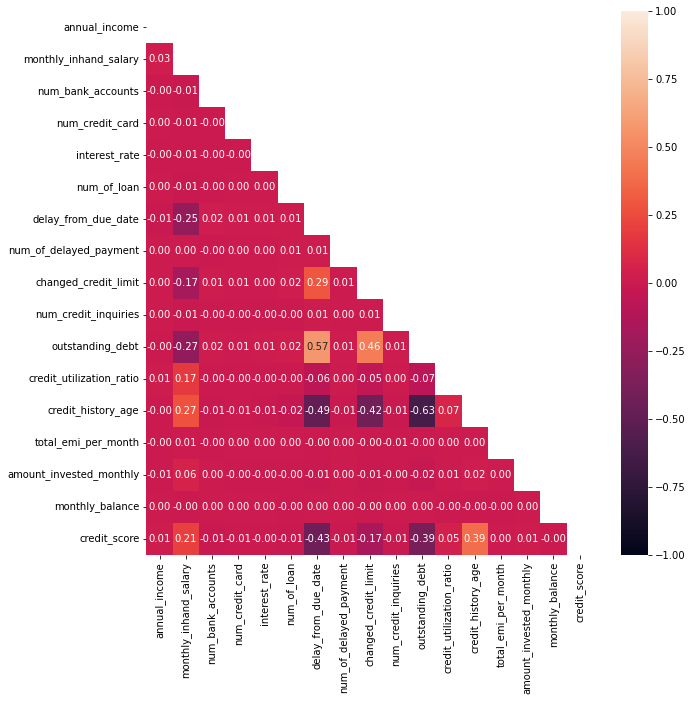

In [23]:
matrix = np.triu(train.corr())
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot = True, fmt = ".2f", mask=matrix, vmin=-1.0, vmax=1.0)
plt.show()

Monthly inhand salary, changed credit limit, and credit age history all have moderate - strong correlation with outstanding debt so we can possibly use outstanding debt to deal with some of these columns' null values.

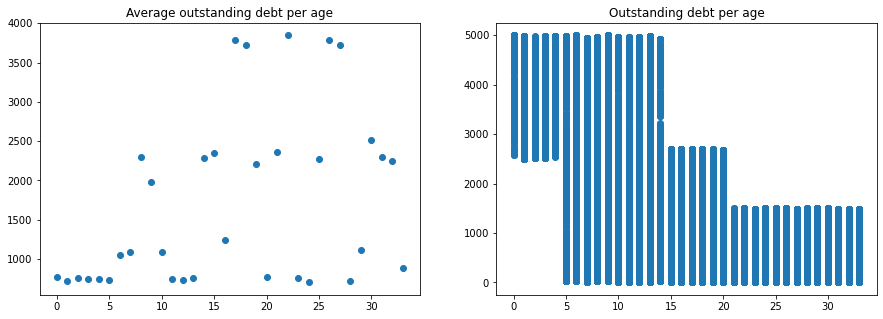

In [24]:
## Lets see correlation between credit_history_age and outstanding_debt
## Group by the credit history age with the mean of the debt of each age as the aggregate function
credit_debt_df = pd.DataFrame({'outstanding_debt':train['outstanding_debt'], 'credit_history_age':train['credit_history_age']})
credit_debt_df = credit_debt_df.dropna()

credit_debt_df_group = credit_debt_df.groupby('credit_history_age').outstanding_debt.agg('mean')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(credit_debt_df['credit_history_age'].unique(), credit_debt_df_group)
plt.title('Average outstanding debt per age')

plt.subplot(1,2,2)
plt.scatter(credit_debt_df['credit_history_age'], credit_debt_df['outstanding_debt'])
plt.title('Outstanding debt per age')
plt.show()

From the relation we see here, even though outstanding debt and credit age history have very high correlation, it would be quite hard to pinpoint what values the null should be in credit age history.

In [25]:
train[['annual_income','monthly_inhand_salary']].drop_duplicates(subset=['annual_income']).head(14)

,annual_income,monthly_inhand_salary
0,19114.12,1824.843333
8,34847.84,3037.986667
16,143162.64,12187.220000
24,30689.89,2612.490833
32,35547.71,2853.309167
40,73928.46,NaN
48,131313.40,11242.783333
54,10909427.00,NaN
56,34081.38,NaN
64,114838.41,9843.867500


Since they both practically mean the same thing, we can just get rid of the monthly_inhand_salary column. The number of credit inquiries would not change the credit score if a person, so we can drop that as well.

In [26]:
train = train.drop(columns=['num_credit_inquiries','monthly_inhand_salary'])
test = test.drop(columns=['num_credit_inquiries','monthly_inhand_salary'])

We should not replace any null values with the average, median, or mode of the column since everything factors on the individual person. Since there is a significant amount of data in the set, we should be fine in dropping the rows containing any more of the NaN values.

In [27]:
train = train.dropna(subset = ['num_of_delayed_payment','changed_credit_limit','credit_history_age',
                              'amount_invested_monthly','monthly_balance'])
test = test.dropna(subset = ['num_of_delayed_payment','changed_credit_limit','credit_history_age',
                              'amount_invested_monthly','monthly_balance'])

In [28]:
train.shape

(78189, 19)

In [29]:
test.shape

(39135, 18)

In [30]:
train.head()

,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,_,809.98,26.822620,22,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2
3,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,Good,809.98,31.377862,22,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2
5,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8,4,9.27,Good,809.98,27.262259,22,No,49.574949,62.430172,!@9#%8,340.479212,2
6,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,8,11.27,Good,809.98,22.537593,22,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,2
8,34847.84,2,4,6,1,Credit-Builder Loan,3,4,5.42,Good,605.03,24.464031,26,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,1


In [31]:
test.head()

,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,Good,809.98,35.030402,22,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,Good,809.98,33.053114,22,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
3,19114.12,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,Good,809.98,32.430559,23,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,34847.84,2,4,6,1,Credit-Builder Loan,3,1,5.42,Good,605.03,25.926822,27,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
5,34847.84,2,4,6,1,Credit-Builder Loan,3,3,5.42,Good,605.03,30.116600,27,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083


## Data Processing

Plans for processing:
- type_of_loan column should be seperated by commas and created into dummy variables 
- payment_behaviour should be also seperated into dummy variables

In [32]:
train['payment_behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Small_value_payments', '!@9#%8',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Large_value_payments'], dtype=object)

In [33]:
len(train[train['payment_behaviour']=='!@9#%8'])

5886

In [34]:
test['payment_behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Large_value_payments', '!@9#%8',
       'Low_spent_Medium_value_payments',
       'High_spent_Small_value_payments'], dtype=object)

In [35]:
len(test[test['payment_behaviour']=='!@9#%8'])

2962

We do not know what '!@9#%8' represents. Let's assume that it is a placeholder for something and not a NaN value so we do not have to drop it because a lot of rows contain it.

In [36]:
## Payment behaviour into dummy columns 
train = pd.get_dummies(train, columns=['payment_behaviour','credit_mix','payment_of_min_amount'], prefix="", prefix_sep="")

In [37]:
test = pd.get_dummies(test, columns=['payment_behaviour','credit_mix','payment_of_min_amount'], prefix="", prefix_sep="")

Let's also drop the type of loan column, as the type of loan does not matter when predicting a credit score

In [38]:
del train['type_of_loan']
del test['type_of_loan']

In [39]:
train

,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_score,!@9#%8,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Bad,Good,Standard,_,NM,No,Yes
0,19114.12,3,4,3,4,3,7,11.27,809.98,26.822620,22,49.574949,80.415295,312.494089,2,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,19114.12,3,4,3,4,5,4,6.27,809.98,31.377862,22,49.574949,199.458074,223.451310,2,0,0,0,0,0,0,1,0,1,0,0,0,1,0
5,19114.12,3,4,3,4,8,4,9.27,809.98,27.262259,22,49.574949,62.430172,340.479212,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,19114.12,3,4,3,4,3,8,11.27,809.98,22.537593,22,49.574949,178.344067,244.565317,2,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8,34847.84,2,4,6,1,3,4,5.42,605.03,24.464031,26,18.816215,104.291825,470.690627,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,39628.99,4,6,7,2,20,6,9.50,502.38,39.323569,31,35.104023,140.581403,410.256158,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
99995,39628.99,4,6,7,2,23,7,11.50,502.38,34.663572,31,35.104023,60.971333,479.866228,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
99996,39628.99,4,6,7,2,18,7,11.50,502.38,40.565631,31,35.104023,54.185950,496.651610,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
99997,39628.99,4,6,5729,2,27,6,11.50,502.38,41.255522,31,35.104023,24.028477,516.809083,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [40]:
test

,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,!@9#%8,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Bad,Good,Standard,_,NM,No,Yes
0,19114.12,3,4,3,4,3,7,11.27,809.98,35.030402,22,49.574949,236.642682,186.266702,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,19114.12,3,4,3,4,3,9,13.27,809.98,33.053114,22,49.574949,21.465380,361.444004,0,0,1,0,0,0,0,0,1,0,0,0,1,0
3,19114.12,3,4,3,4,4,5,11.27,809.98,32.430559,23,49.574949,39.082511,343.826873,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,34847.84,2,4,6,1,3,1,5.42,605.03,25.926822,27,18.816215,39.684018,485.298434,0,1,0,0,0,0,0,0,1,0,0,0,1,0
5,34847.84,2,4,6,1,3,3,5.42,605.03,30.116600,27,18.816215,251.627369,303.355083,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,20002.88,10,8,29,5,33,25,18.31,3571.70,37.528511,6,60.964772,71.794421,350.231473,0,0,0,0,0,0,1,1,0,0,0,0,0,1
49994,20002.88,10,8,29,5,33,22,18.31,3571.70,27.027812,6,60.964772,50.846847,341.179047,0,0,0,1,0,0,0,1,0,0,0,0,0,1
49997,39628.99,4,6,7,2,23,5,13.50,502.38,36.858542,32,35.104023,10000.000000,349.726332,0,0,0,0,1,0,0,0,1,0,0,0,1,0
49998,39628.99,4,6,7,2,21,6,11.50,502.38,39.139840,32,35.104023,97.598580,463.238981,0,0,0,1,0,0,0,0,1,0,0,0,1,0


## A little bit more data cleaning
There are a few more inconsistencies in the data which we can update to make our prediction as accurate as possible.

- Line 99997 suggests that the interest rate of a credit card can go as high as 5729 which does not seem realistic
- A lot of dashed values "-" in the credit_mix column

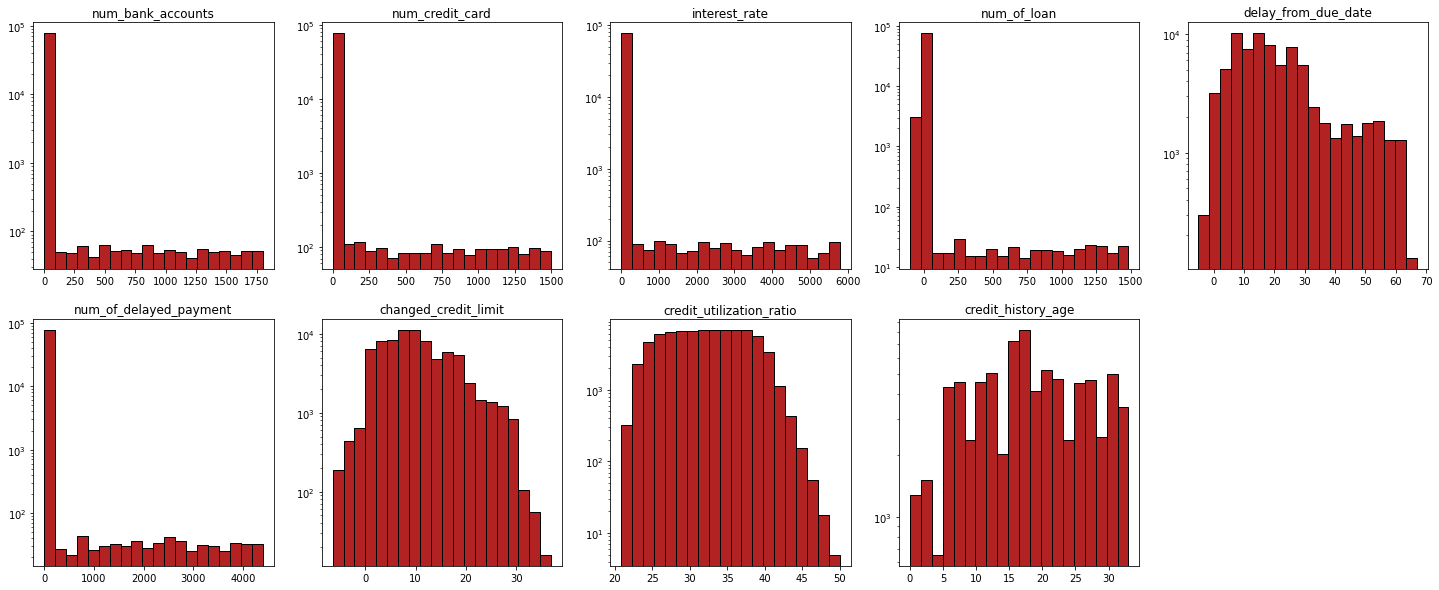

Maximum of num_bank_accounts is: 1798
Minimum of num_bank_accounts is: -1


Maximum of num_credit_card is: 1499
Minimum of num_credit_card is: 0


Maximum of interest_rate is: 5797
Minimum of interest_rate is: 1


Maximum of num_of_loan is: 1485
Minimum of num_of_loan is: -100


Maximum of delay_from_due_date is: 67
Minimum of delay_from_due_date is: -5


Maximum of num_of_delayed_payment is: 4397
Minimum of num_of_delayed_payment is: -3


Maximum of changed_credit_limit is: 36.97
Minimum of changed_credit_limit is: -6.48


Maximum of credit_utilization_ratio is: 50.00000000000001
Minimum of credit_utilization_ratio is: 20.88125003902868


Maximum of credit_history_age is: 33
Minimum of credit_history_age is: 0




In [41]:
## Check odd values in columns
columns = ['num_bank_accounts','num_credit_card','interest_rate','num_of_loan','delay_from_due_date',
          'num_of_delayed_payment','changed_credit_limit','credit_utilization_ratio','credit_history_age']

plt.figure(figsize=(25,10))
for ind,column in enumerate(columns):
    plt.subplot(2,5,ind+1)
    plt.hist(train[column],bins=20,range=(train[column].min(),train[column].max()),log=True,color='firebrick',ec="k")
    plt.title(column)
plt.show()

for ind,column in enumerate(columns):
    print('Maximum of '+ column + ' is: ' + str(train[column].max()))
    print('Minimum of '+ column + ' is: ' + str(train[column].min()))
    print('\n')

From the data above, we can see that delay_from_due_date, changed_credit_limit, credit_utilization_ratio, and credit_history_age seem to have reasonable values, apart from the negative values in some of them. A negative value from changed_credit_limit is what we can assume to be one's credit limit being lowered which we can keep. a negative value from delay_from_due_date is what we can assume to be payments made early but that is a bold assumption, so we will get rid of rows with negative values, same with num_of_delayed_payment.

In [42]:
train = train[(train['num_of_delayed_payment']>=0) & (train['delay_from_due_date']>=0)]
test = test[(test['num_of_delayed_payment']>=0) & (test['delay_from_due_date']>=0)]

Now we should focus on the upper outliers for the other five columns, which have a lot of unrealistic entries.

In [43]:
cols = ['num_bank_accounts','num_credit_card','interest_rate','num_of_loan','num_of_delayed_payment']
train[cols].describe()

,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,num_of_delayed_payment
count,77188.000000,77188.000000,77188.000000,77188.000000,77188.000000
mean,17.008136,22.834262,73.573742,2.952816,31.135332
std,116.666122,130.257597,471.550362,61.793420,226.188341
min,-1.000000,0.000000,1.000000,-100.000000,0.000000
25%,4.000000,4.000000,8.000000,1.000000,9.000000
50%,6.000000,6.000000,14.000000,3.000000,14.000000
75%,7.000000,7.000000,20.000000,5.000000,18.000000
max,1798.000000,1499.000000,5797.000000,1485.000000,4397.000000


In [44]:
for col in cols:
    print('Upper outlier limit for ' + col + ': ' + str(train[col].describe()[6]+(train[col].describe()[6]-train[col].describe()[4])*1.5))
    print('Lower outlier limit for ' + col + ': '+ str(train[col].describe()[4]-(train[col].describe()[6]-train[col].describe()[4])*1.5))
    print('\n')

Upper outlier limit for num_bank_accounts: 11.5
Lower outlier limit for num_bank_accounts: -0.5


Upper outlier limit for num_credit_card: 11.5
Lower outlier limit for num_credit_card: -0.5


Upper outlier limit for interest_rate: 38.0
Lower outlier limit for interest_rate: -10.0


Upper outlier limit for num_of_loan: 11.0
Lower outlier limit for num_of_loan: -5.0


Upper outlier limit for num_of_delayed_payment: 31.5
Lower outlier limit for num_of_delayed_payment: -4.5




In [45]:
print(upper_outlier(train,'num_bank_accounts'))

11.5


Now, we should also get rid of the negative values from these columns, and get rid of extreme outliers.

In [46]:
train = train[(train['num_bank_accounts']>=0) & (train['num_bank_accounts']<=upper_outlier(train,'num_bank_accounts')) &
             (train['num_credit_card']>=0) & (train['num_credit_card']<=upper_outlier(train,'num_credit_card')) &
             (train['interest_rate']>=0) & (train['interest_rate']<=upper_outlier(train,'interest_rate')) &
             (train['num_of_loan']>=0) & (train['num_of_loan']<=upper_outlier(train,'num_of_loan')) &
             (train['num_of_delayed_payment']>=0) & (train['num_of_delayed_payment']<=upper_outlier(train,'num_of_delayed_payment'))]

test = test[(test['num_bank_accounts']>=0) & (test['num_bank_accounts']<=upper_outlier(test,'num_bank_accounts')) &
             (test['num_credit_card']>=0) & (test['num_credit_card']<=upper_outlier(test,'num_credit_card')) &
             (test['interest_rate']>=0) & (test['interest_rate']<=upper_outlier(test,'interest_rate')) &
             (test['num_of_loan']>=0) & (test['num_of_loan']<=upper_outlier(test,'num_of_loan')) &
             (test['num_of_delayed_payment']>=0) & (test['num_of_delayed_payment']<=upper_outlier(test,'num_of_delayed_payment'))]

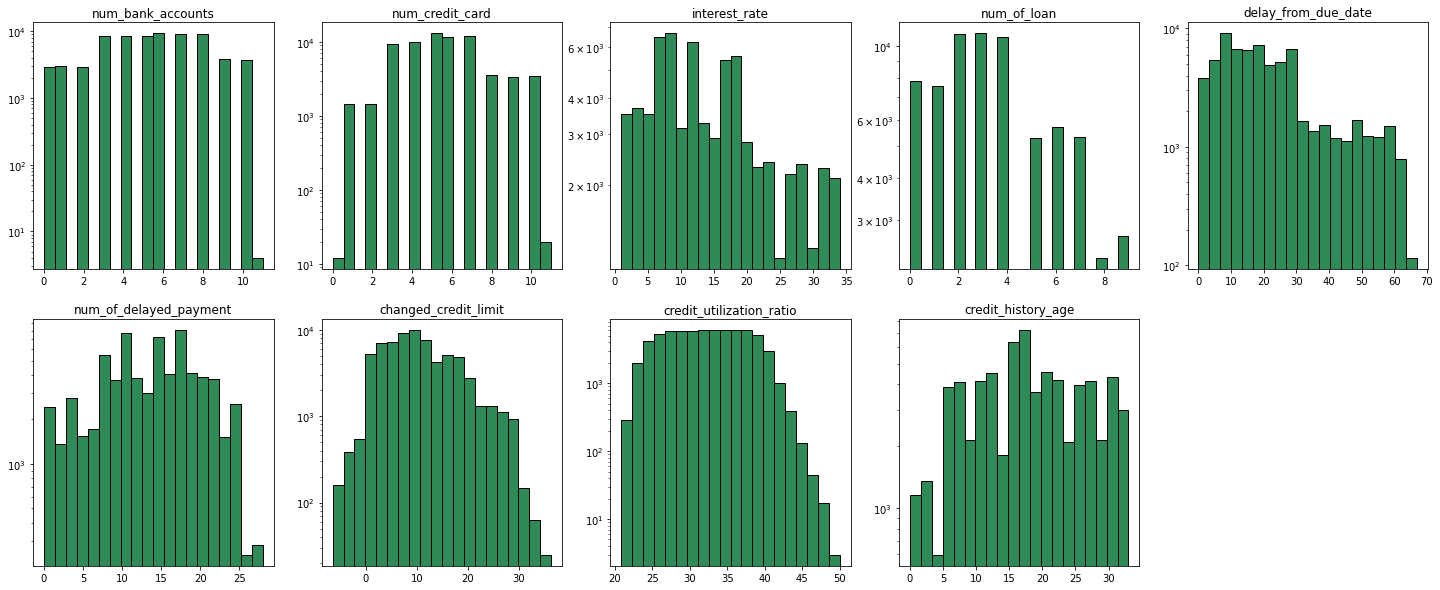

Maximum of num_bank_accounts is: 11
Minimum of num_bank_accounts is: 0


Maximum of num_credit_card is: 11
Minimum of num_credit_card is: 0


Maximum of interest_rate is: 34
Minimum of interest_rate is: 1


Maximum of num_of_loan is: 9
Minimum of num_of_loan is: 0


Maximum of delay_from_due_date is: 67
Minimum of delay_from_due_date is: 0


Maximum of num_of_delayed_payment is: 28
Minimum of num_of_delayed_payment is: 0


Maximum of changed_credit_limit is: 36.29
Minimum of changed_credit_limit is: -6.48


Maximum of credit_utilization_ratio is: 50.00000000000001
Minimum of credit_utilization_ratio is: 20.88125003902868


Maximum of credit_history_age is: 33
Minimum of credit_history_age is: 0




In [47]:
## Check odd values in columns
columns = ['num_bank_accounts','num_credit_card','interest_rate','num_of_loan','delay_from_due_date',
          'num_of_delayed_payment','changed_credit_limit','credit_utilization_ratio','credit_history_age']

plt.figure(figsize=(25,10))
for ind,column in enumerate(columns):
    plt.subplot(2,5,ind+1)
    plt.hist(train[column],bins=20,log=True,color="seagreen",ec="k")
    plt.title(column)
plt.show()

for ind,column in enumerate(columns):
    print('Maximum of '+ column + ' is: ' + str(train[column].max()))
    print('Minimum of '+ column + ' is: ' + str(train[column].min()))
    print('\n')

Data is much better with better distributions.

Drop columns that are heavily correlated with eachother

#### Avoid Multicollinearity
We should avoid heavily correlated features since that will mess up our model

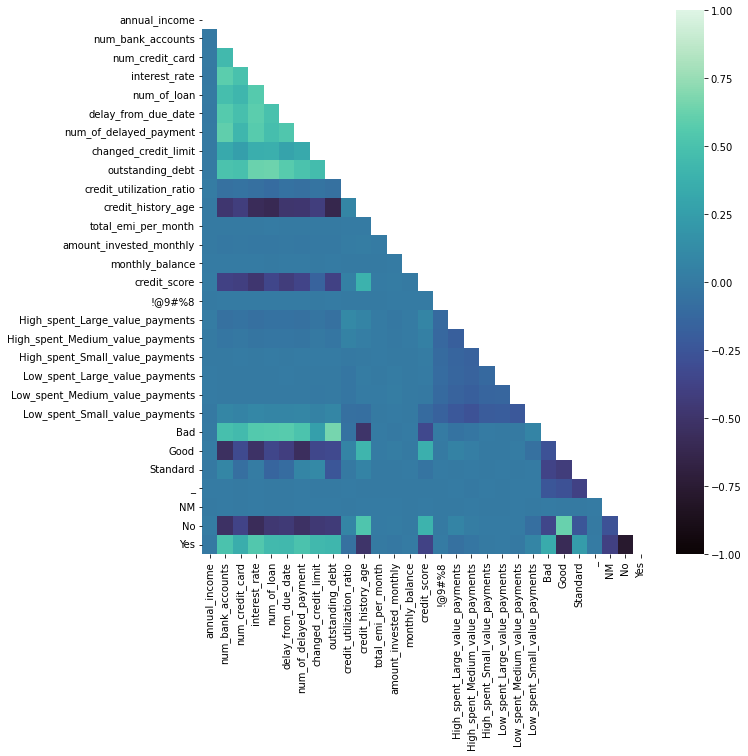

In [48]:
matrix_2 = np.triu(train.corr())
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot = False, cmap="mako", mask=matrix_2, vmin=-1.0, vmax=1.0)
plt.show()

As we can see, we have a lot of correlated variables, in the next step, we can use an RFECV to eliminate the worst features for our model

## Predictions

In [49]:
feature_cols = list(train.columns)
del feature_cols[feature_cols.index('credit_score')]

In [50]:
feature_cols

['annual_income',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'outstanding_debt',
 'credit_utilization_ratio',
 'credit_history_age',
 'total_emi_per_month',
 'amount_invested_monthly',
 'monthly_balance',
 '!@9#%8',
 'High_spent_Large_value_payments',
 'High_spent_Medium_value_payments',
 'High_spent_Small_value_payments',
 'Low_spent_Large_value_payments',
 'Low_spent_Medium_value_payments',
 'Low_spent_Small_value_payments',
 'Bad',
 'Good',
 'Standard',
 '_',
 'NM',
 'No',
 'Yes']

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [52]:
train['credit_score'] = train['credit_score'].astype('int')

#### Use RFECV to find best features
I have already done a randomized search on 3 models and found the best one, we will now do a RFECV to see which features give us the best results

In [53]:
rfe = RFECV(RandomForestClassifier(n_estimators=50,min_samples_split=10,min_samples_leaf=1,max_depth=10,criterion='gini'),cv=5)
rfe.fit(train[feature_cols],train['credit_score'])

RFECV(cv=5,
      estimator=RandomForestClassifier(max_depth=10, min_samples_split=10,
                                       n_estimators=50))

In [54]:
feature_mask = rfe.support_
feature_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True])

In [67]:
cols_to_keep = []
for mask, col_name in zip(feature_mask,feature_cols):
    if mask == True:
        cols_to_keep.append(col_name)

In [68]:
cols_to_keep

['annual_income',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'outstanding_debt',
 'credit_history_age',
 'total_emi_per_month',
 'Bad',
 'Good',
 'Standard',
 'No',
 'Yes']

These were the most useful columns for the model, the rest were dropped

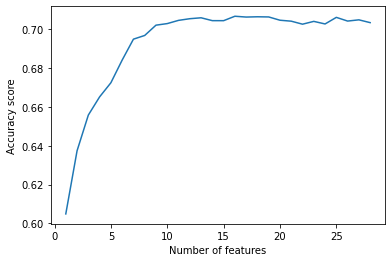

In [57]:
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Accuracy score")
plt.plot(range(1, len(rfe.grid_scores_) + 1), rfe.grid_scores_)
plt.show()

In [58]:
print(max(rfe.grid_scores_))
print(rfe.n_features_)

0.7067630209836234
16


As we can see, 16 features yields our highest accuracy of around 71%

## Final Steps

#### Test df_transform to check if it transforms a dataframe correctly, comparing it to the test dataframe we have been transforming throughout the project

In [59]:
test2 = pd.read_csv('test.csv')
test2 = df_transform(test2)
test2.equals(test)

True

Our function works!

#### Predicting on the test dataframe

In [60]:
predictions = rfe.predict(test)

In [61]:
from collections import Counter
count = Counter(predictions)
print(count)

Counter({1: 18802, 0: 9132, 2: 6693})


In [62]:
train['credit_score'].value_counts()

1    37001
0    20265
2    11876
Name: credit_score, dtype: int64

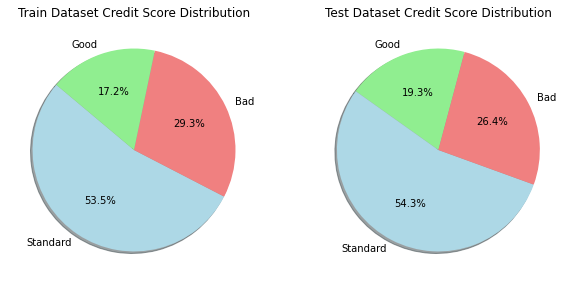

In [63]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.pie(train['credit_score'].value_counts(), labels=['Standard','Bad','Good'], 
        colors=['lightblue', 'lightcoral', 'lightgreen'], 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Train Dataset Credit Score Distribution')

plt.subplot(1,2,2)
plt.pie(list(count.values()), labels=['Good','Standard','Bad'],colors=['lightgreen', 'lightblue', 'lightcoral'], 
        autopct='%1.1f%%', shadow=True, startangle=75)
plt.title('Test Dataset Credit Score Distribution')
plt.show()

## Conclusion
As we can see, our random forest model works very well as the proportion of bad, standard, and good are very similar to the training dataset, but it does tend to slightly underestimate bad (0) credit scores and slightly overestimate the standard (1) credit scores. Overall, this model works very well. Since there is no credit_score column in the test dataset, this distribution estimate should be good enough to know that this model works well.

#### Save model

In [64]:
import joblib
joblib.dump(rfe, 'credit_score_predictor.pkl')

['credit_score_predictor.pkl']